## Finding the Best Markets to Advertise a Coding E-Learning Product

The aim of this analysis will be to find the best markets for an E-Learning product to advertise in. Our company's E-Learning product offers courses in programming, and includes domains such as web development, mobile development, security, data science and machine learning.

### Data

The data we will be using for this project is  [FreeCodeCamp's](https://www.freecodecamp.org) "New Coder" Survey. This survey is a good choice for this type of analysis as it has been answered primarily by the FreeCodeCamp's users and thus is highly relevant to gauge the new user audience. This survey is applicable to our product as we are looking to attract new users using advertising. [FreeCodeCamp's GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey) contains the data, which we will download and use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the FreeCodeCamp Survey data
link_to_github = "https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv"
survey = pd.read_csv(link_to_github, low_memory=False)

# usefull overview of dataframe
print(survey.shape)
pd.options.display.max_columns = survey.shape[1] # prevent column cut-off
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Sample Representativity
We want to know: <br>
* Where the new coders are from
* Which locations have the most amount of new coders
* How much money do they spend on learning to code <br>

In order to answer these questions for our analysis, we need to see which features of the dataset allow us to gain insight on new coders. The 'JobRoleInterest' column assigns the role/roles a participant is interested in working in. This means that they must also be interested in learning about that role/roles. We will create a frequency table of this column to confirm we have relevant data.

In [3]:
# output the frequency table for JobRoleInterest column
survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                6.435927
  Data Scientist                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                   2.030892
  Mobile Developer                                                                                                                                       1.673341
                                                                                                                                                          ...    
  Front-End Web Developer, D

Quick insights:
* We can see that a lot of users are interested in Web Dev
* There are also some people interested in  Mobile Development
* Few people interested in other domains 

We should also note that many people have entered more than one response. It might be useful to investigate how many people are interested in a single domain compared to those with multiple interests.

In [4]:
# split at the commas
job_interests = survey['JobRoleInterest'].dropna()
split_job_interests = job_interests.str.split(',')

# create frequency table for number of interests
number_interests = split_job_interests.apply(lambda job: len(job))
number_interests.value_counts(normalize = True) * 100        # get percent for frequency table

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Looking at the table, only about 31% are going in with one subject in mind. It seems that most people have picked two or more interests to pursue in the learning platform. Since this product primarily focuses on Web and Mobile Development, we will try to find out how many people chose at least one of the two.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


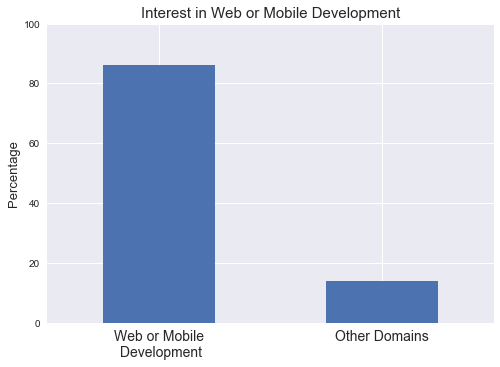

In [5]:
# create frequency table for people who chose either mobile or web dev
web_mob = job_interests.str.contains('Web Developer|Mobile Developer')
web_mob_table = web_mob.value_counts(normalize = True) * 100
print(web_mob_table)

# visualizing 
%matplotlib inline
plt.style.use('seaborn')
web_mob_table.plot.bar()
plt.title('Interest in Web or Mobile Development', fontsize= 15)
plt.ylabel('Percentage', fontsize = 13)
plt.xticks([0,1],['Web or Mobile\n Development', 'Other Domains'], rotation = 0, fontsize=14)
plt.ylim([0,100])
plt.show()

Roughly 86% of repondents say that they are interested in Web or Mobile Development. This offers strong validity to consider this sample representative for our specific group. As our product offers courses on Web and Mobile development, it makes sense that we want to advertise to people interested in those topics as well.
<br>
In order to analyze which markets to advertise in, we need to now investigate:
* The location of new users 
* Which locations have the greatest amount of new users
* How much money are they willing to spend on their learning

### Locations of New Users

We need to calculate where new users are from and how many of them are from a certain location (density). The dataset provides information about location at a country level, so it reasonable to consider each country as a seperate market. Our goal now, is to find the best two countries to advertise in.
<br>

The CountryLive feature of the dataset contains information on where the new user currently lives. We will begin by creating a frequency table and only consider those who answered the question about role interest to ensure sample representativity.

In [6]:
# only include those who answered role interest
survey_clean = survey[survey['JobRoleInterest'].notnull()].copy()

# calculate absolute and relative frequencies
abs_freq = survey_clean['CountryLive'].value_counts()
rel_freq = survey_clean['CountryLive'].value_counts(normalize = True) * 100

# construct dataframe table for output
pd.DataFrame(data={'Total New Users': abs_freq, '%': rel_freq})

,Total New Users,%
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Jordan,1,0.014624
Gibraltar,1,0.014624
Kyrgyzstan,1,0.014624
Nicaragua,1,0.014624


The U.S. has around 46% of new users, which makes it a very important market. India and the UK follow, with 7.7% and 4.6% respectively. The difference between India (7.7%), UK (4.6%) and Canada (3.8%) isn't that great, so we will consider these four markets.
<br>

The next step will be to determine how much money are learners in these markets willing to spend. Advertising in markets with good densities, and willingness to spend will most likely result in profitability for the company.

### Money Spent on Learning

We need to find out how much money are people in these markets willing to spend per month. Our company offers a subscription based service, at a rate of \$59 per month. 

* The MoneyForLearning column contains information in USD about money spent by a person from starting coding to answering the survey. <br>

* To find $ per month, we need to divide the values in MoneyForLearning by MonthsProgramming column. We will replace answers that are 0 months with 1 months for students who just started (as they are in their 1st month of learning).

* We will consider the U.S., India, UK, and Canada markets because they had higher densities of users and also because of their use of English as a primary language. Since our course is in English, we target these markets to maximize effectiveness of our advertisement.

In [7]:
# Replace 0 by 1, to avoid errors 
survey_clean['MonthsProgramming'] = survey_clean['MonthsProgramming'].replace(0,1)

# create a new column that is money per month 
survey_clean['money_per_month'] = survey_clean['MoneyForLearning'] / survey_clean['MonthsProgramming']

# only keep non null values
survey_clean = survey_clean[survey_clean['money_per_month'].notnull()]

Next, we have to group the data by country to determine the average money spent by a new learner in that market. We will clean the data by removing rows where the CountryLive column is empty, to ensure accuracy.

In [8]:
# remove rows where CountryLive is empty
survey_clean = survey_clean[survey_clean['CountryLive'].notnull()]

#check how ma
survey_clean['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
                            ... 
Kyrgyzstan                     1
Gibraltar                      1
Botswana                       1
Cuba                           1
Cameroon                       1
Name: CountryLive, Length: 131, dtype: int64

We still have enough data to continue our analysis in the four countries. Now we can find the average money spent in a market by a new user.

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64


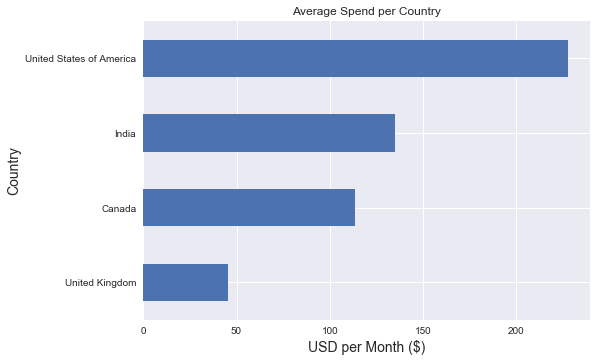

In [9]:
# compute mean
countries_mean = survey_clean.groupby('CountryLive').mean()

# print values for chosen countries
avg_spend = countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]
print(avg_spend)

#plot
avg_spend.sort_values().plot(kind = 'barh')
plt.xlabel("USD per Month ($)", fontsize = 14)
plt.ylabel("Country" ,fontsize = 14)
plt.title("Average Spend per Country")
plt.show()

The results are surprising, as spend in UK and Canada is lower than that of India. Intuitively, we expect countries like the UK and Canada to have greater spend than India, using metrics such as
[GDP per capita for India](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies). The results indicate that:
* We have outliers skewing the mean for India to be greater
* We have outliers skewing the mean lower for UK and Canada
* Or the results are correct <br>

Let us continue to explore and look for outliers in the data.

### Correcting for Outliers

We will use box plots to visualize the money_per_month column, and note any outliers.

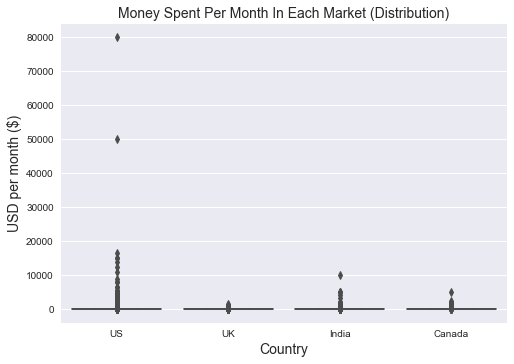

In [10]:
# new datafram with only our 4 countries of interest
markets = survey_clean[survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

#plot
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = markets)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.title('Money Spent Per Month In Each Market (Distribution)',fontsize = 14)
plt.ylabel('USD per month ($)', fontsize=14)
plt.xlabel('Country',fontsize = 14)
plt.show()

While UK, India, and Canada look normal at first glance, the US has two extreme outliers. It appears that there are two points in the US where the respondents are spending over \\$50,000 per month. While this is not impossible, it is still highly unlikely so we will remove all rows that go past $20,000 per month to be safe.

In [11]:
# remove all above $20000 per month
survey_clean = survey_clean[survey_clean['money_per_month'] < 20000]

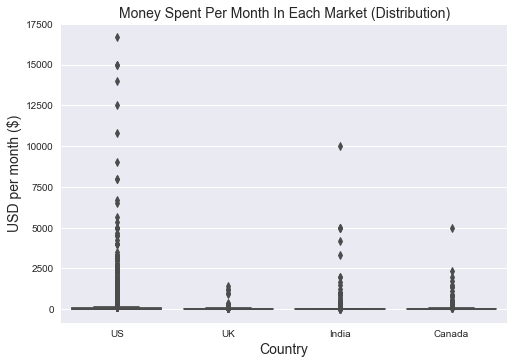

In [12]:
# use our 4 markets
markets = survey_clean[survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

#plot
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = markets)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.title('Money Spent Per Month In Each Market (Distribution)',fontsize = 14)
plt.ylabel('USD per month ($)', fontsize=14)
plt.xlabel('Country',fontsize = 14)
plt.show()

There are a decent amount of outliers for India where over \$2500 per month is spent. We will investigate if this is due to bootcamps, as they can be very expensive.

In [13]:
# Check the outliers for India
india_outliers = markets[(markets['CountryLive'] == 'India') & (markets['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,...,in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,...,no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 m

As we can see, the AttendedBootcamp column is 0 for all participants. It is unclear then if this much money was *actually* spent. If we refer back to the original question on the survey, it states: "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?" <br>
This statement might have been misunderstood and the people responding might have included tuition. Overall, it seems better to drop these values.

In [14]:
# remove outliers for India
markets = markets.drop(india_outliers.index) 

There are some other outliers in the US market as well. We can see from the box plot that there are several points over \$6000 per month. We will examine these outliers to extract more details.

In [15]:
# Check the outliers for US
US_outliers = markets[(markets['CountryLive'] == 'United States of America') & (markets['money_per_month'] >= 6000)]
US_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,...,in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,...,in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,bachelor's degree,

In the US market, it looks like six out of the eleven people did attend bootcamps. This explains the large sum of monthly spend. However, the remaining five have no explanations for such large monthly spends, so once again we will remove these points to get a more accurate picture of the US market. <br>

Another thing to note is that eight people in our outliers said they have been programming for less than three months, which means that they likely paid large amounts of money for a bootcamp before answering the survey. It is quite likely that they would not continue to spend that much money for the months to come, and that their actual spend is significantly lower. <br>

We will remove:
* High spend that didn't attend bootcamps
* High Spend and programming for less than 3 months

In [16]:
# Remove US high spend and no bootcamp
no_bootcamp = markets[(markets['CountryLive'] == 'United States of America') & (markets['money_per_month'] >= 6000) &
                      (markets['AttendedBootcamp'] == 0)]

markets = markets.drop(no_bootcamp.index)

# Remove US high spend and less than 3 months programming
three_months = markets[(markets['CountryLive'] == 'United States of America') & (markets['money_per_month'] >= 6000) &
                       (markets['MonthsProgramming'] <= 3)]

markets = markets.drop(three_months.index)

Lastly, we will take a look at Canada's outliers that have a spend over \$5000 per month.

In [17]:
# Check the Canada market outliers
canada_outliers = markets[(markets['CountryLive'] == 'Canada') & (markets['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,...,from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This person did attend a bootcamp, but just like the US respondents, the spend most likely went down after the bootcamp, so it is not an accurate representation. We will remove this outlier just like the US ones.

In [18]:
# Remove Canada outlier
markets = markets.drop(canada_outliers.index)

Now we can recalculate the mean and plot again. The outliers have been reduced and our analysis should be more accurate.

In [19]:
# calculate mean spend per month in our selected markets
new_mean = markets.groupby('CountryLive').mean()['money_per_month']
new_mean

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

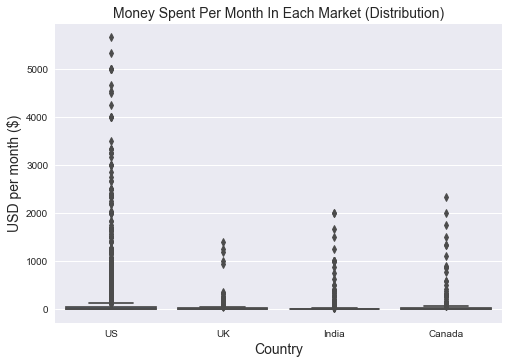

In [20]:
#plot
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = markets)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.title('Money Spent Per Month In Each Market (Distribution)',fontsize = 14)
plt.ylabel('USD per month ($)', fontsize=14)
plt.xlabel('Country',fontsize = 14)
plt.show()

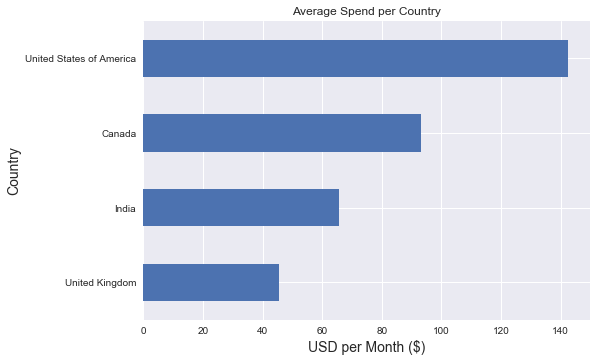

In [21]:
#plot average spend
new_mean.sort_values().plot(kind = 'barh')
plt.xlabel("USD per Month ($)", fontsize = 14)
plt.ylabel("Country" ,fontsize = 14)
plt.title("Average Spend per Country")
plt.show()

## Picking the Two Best Markets To Advertise In

From the data, it is pretty evident that the US should be a primary market to advertise in. The US market is willing to spend about \$143 dollars per month, which is more than double of our subscription. Further, Canada seems like a good choice as well, as they spent the second highest, however, lets take a look at the densities of these markets.

In [22]:
# Frequency table for each market 
markets['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

From here we see that we would have almost twice as many potential customers in India compared to Canada. Indian market spends around \$66 per month, so our subscription fits their budget. The UK has been eliminated here due to the budget constraint. At this point, the US, Canada, and India seem to be the best markets for this product type. <br>

We split our budget in several ways:
1. Dedicate 100\% of our budget to advertise in the US market since demand is strong.
2. Split between US, Canada, and India in various distributions.
    * We can do 60\% US, 20\% Canada, and 20\% India.
    * Or, 50\% US, 30\% India, 20\% Canda
    * Other combinations, but prioritizing the US market
3. We can choose US and Canada or US and India
    * 70\% US with 30\% India
    * Or, 70\% US and 30\% Canada
    * Other combinations

So, while the US is certainly the best market to advertise in, we would still need more information to distinguish between Canada and India. In our organization, we could refer our results to the marketing and survey teams and ask for additional data or surveys in those particular markets. 

## Conclusion

In our analysis, we utilized data from a new user survey to determine the best markets to advertise our product in. We concluded that the US market is strong, and meets the needs of our products, and that we would benefit from advertising in this market. <br>

Finding the second best market proved to be more difficult without additional data, as we were unable to truly distinguish between the advantages of the Canadian and Indian markets. Our proposal was that we prioritize the US market and then either distribute between US-Canada-India or US-Canada or US-India. <br>

We have forwarded our analysis to the marketing and survey departments so that they can conduct more research and gather additional information to make the best data driven decision.
